In [26]:
import matplotlib.pyplot as plt

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns

In [11]:
csv_file_path=r"housing\artifact\data_ingestion\2023-07-14-13-03-14\raw_data\housing.csv"

In [17]:
housing_data_frame=pd.read_csv(csv_file_path)

In [18]:
housing_data_frame.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


<Axes: ylabel='Frequency'>

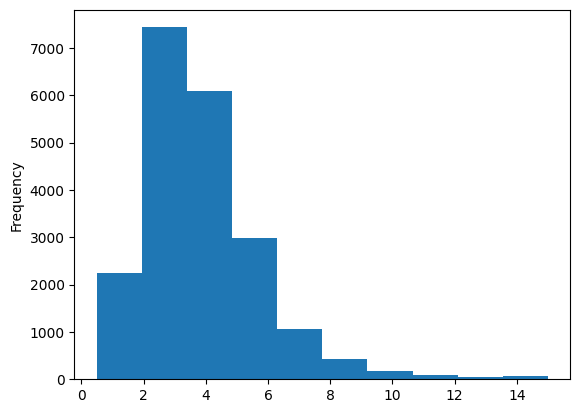

In [19]:
housing_data_frame['median_income'].plot(kind='hist')

In [20]:
housing_data_frame["income_cat"] = pd.cut(
                housing_data_frame["median_income"],
                bins=[0.0, 1.5, 3.0, 4.5, 6.0, np.inf],
                labels=[1,2,3,4,5]
            )

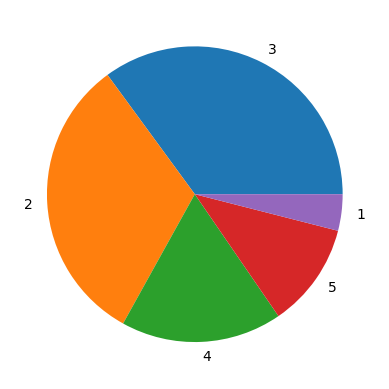

In [29]:
plt.pie(housing_data_frame.income_cat.value_counts(),labels=housing_data_frame.income_cat.value_counts().index)
plt.show()

In [30]:
from sklearn.model_selection import StratifiedShuffleSplit  

In [31]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

In [33]:
for train_ix, test_ix in split.split(housing_data_frame, housing_data_frame["income_cat"]):
    print(train_ix,test_ix)

[12655 15502  2908 ... 19263 19140 19773] [ 5241 17352  3505 ... 17223 10786  3965]


In [34]:
train_df = housing_data_frame.loc[train_ix]

In [36]:
train_df.shape

(16512, 11)

In [37]:
housing_data_frame.shape

(20640, 11)

In [38]:
test_df = housing_data_frame.loc[test_ix]

In [39]:
test_df.shape

(4128, 11)

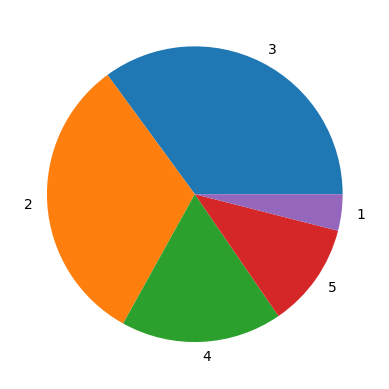

In [40]:
plt.pie(train_df.income_cat.value_counts(),labels=train_df.income_cat.value_counts().index)
plt.show()

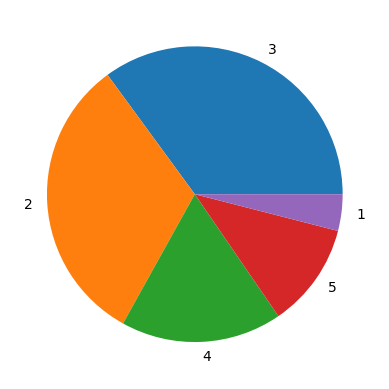

In [41]:
plt.pie(test_df.income_cat.value_counts(),labels=test_df.income_cat.value_counts().index)
plt.show()

In [45]:
housing_data_frame.columns,housing_data_frame.dtypes.values

(Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
        'total_bedrooms', 'population', 'households', 'median_income',
        'median_house_value', 'ocean_proximity', 'income_cat'],
       dtype='object'),
 array([dtype('float64'), dtype('float64'), dtype('float64'),
        dtype('float64'), dtype('float64'), dtype('float64'),
        dtype('float64'), dtype('float64'), dtype('float64'), dtype('O'),
        CategoricalDtype(categories=[1, 2, 3, 4, 5], ordered=True)],
       dtype=object))

In [47]:
data_type = list(map(lambda x:str(x).replace("dtype('","").replace("')",""), housing_data_frame.dtypes.values))

In [48]:
columns = housing_data_frame.columns

In [49]:
# Create a schema file
dict(zip(columns,data_type))

{'longitude': 'float64',
 'latitude': 'float64',
 'housing_median_age': 'float64',
 'total_rooms': 'float64',
 'total_bedrooms': 'float64',
 'population': 'float64',
 'households': 'float64',
 'median_income': 'float64',
 'median_house_value': 'float64',
 'ocean_proximity': 'object',
 'income_cat': 'category'}